In [1]:
!pip install mplfinance
!pip install pmdarima

In [2]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

from scipy import stats
from scipy.stats import zscore

from pmdarima.arima.utils import ndiffs

import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import coint
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.stats.diagnostic import acorr_ljungbox


from itertools import product
from tqdm.notebook import tqdm

import datetime
from datetime import date, timedelta

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
tickers = input("Enter the Equity name. eg: AAPL US Equity\n")
#"AMZN US Equity"

In [ ]:
commands = "PX_LAST"

In [3]:

start = input("Enter the start date in YYYY-MM-DD format")
#start date considered - 2012-05-12'
a=input("Type YES if you want current date as end date or no for custom date")
 
if a=="YES":
    end=str(date.today())
else:
    end = str(input("Enter the end date in YYYY-MM-DD format"))
#end date considered - 2024-08-24'

In [9]:
#importing the results in a .h5 file 
filename = hashlib.md5(''.join((tickers,"+",
          commands,"+",
          start,"+",
          end)).encode('utf-8')).hexdigest()
 
if os.path.exists(filename+'.csv'):
    data = pd.read_csv(filename+".csv", header=[0, 1],
    parse_dates=True,
    index_col=0)
else:
    data = blp.bdh(tickers=tickers.split(', ') , flds=commands.split(', '), start_date=start,  end_date=end,Per='D', Fill='P', Days='A', adjust='all')
    data.to_csv(filename+".csv")
   
df = data[tickers]
df

In [13]:
# creating a copy dataframe for PX_LAST_price
df_last = df[['PX_LAST']].copy()
df_last = df_last.dropna()
#df_last.head(20)

In [15]:
df_last

,PX_LAST
Dates,
2012-05-18,10.692
2012-05-21,10.906
2012-05-22,10.767
2012-05-23,10.864
2012-05-24,10.762
...,...
2024-08-06,161.930
2024-08-07,162.770
2024-08-08,165.800


In [17]:
def df_last_plot():
    sns.set(rc={'figure.figsize':(16, 8)})
    df_last.plot(label=f"{label_txt}")
    plt.title(f"{title_txt}", color = 'black', fontsize = 20)
    plt.xlabel('Date', color = 'black', fontsize = 15);
    plt.legend()

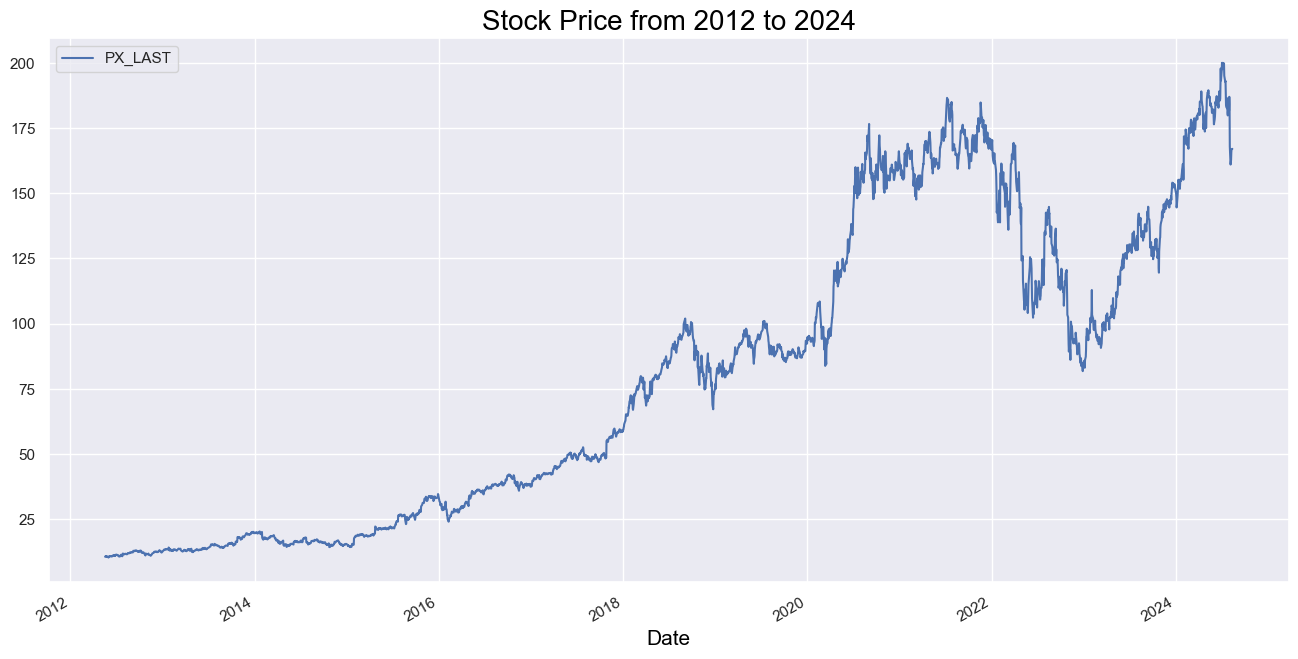

In [19]:
title_txt = "Stock Price from 2012 to 2024"
label_txt = "Stock Adjusted Close Price"

df_last_plot()

In [21]:
df_last_923 = df_last[-923:]

In [23]:
def df_last_923_plot():
    sns.set(rc={'figure.figsize':(16,8)})
    df_last_923.plot(label = f"{label_txt}")
    plt.title(f"{title_txt}", color='black', fontsize = 20)
    plt.xlabel('Date', color='black', fontsize = 15)
    plt.ylabel('Stock price(p)', color = 'black', fontsize = 15);
    plt.legend()

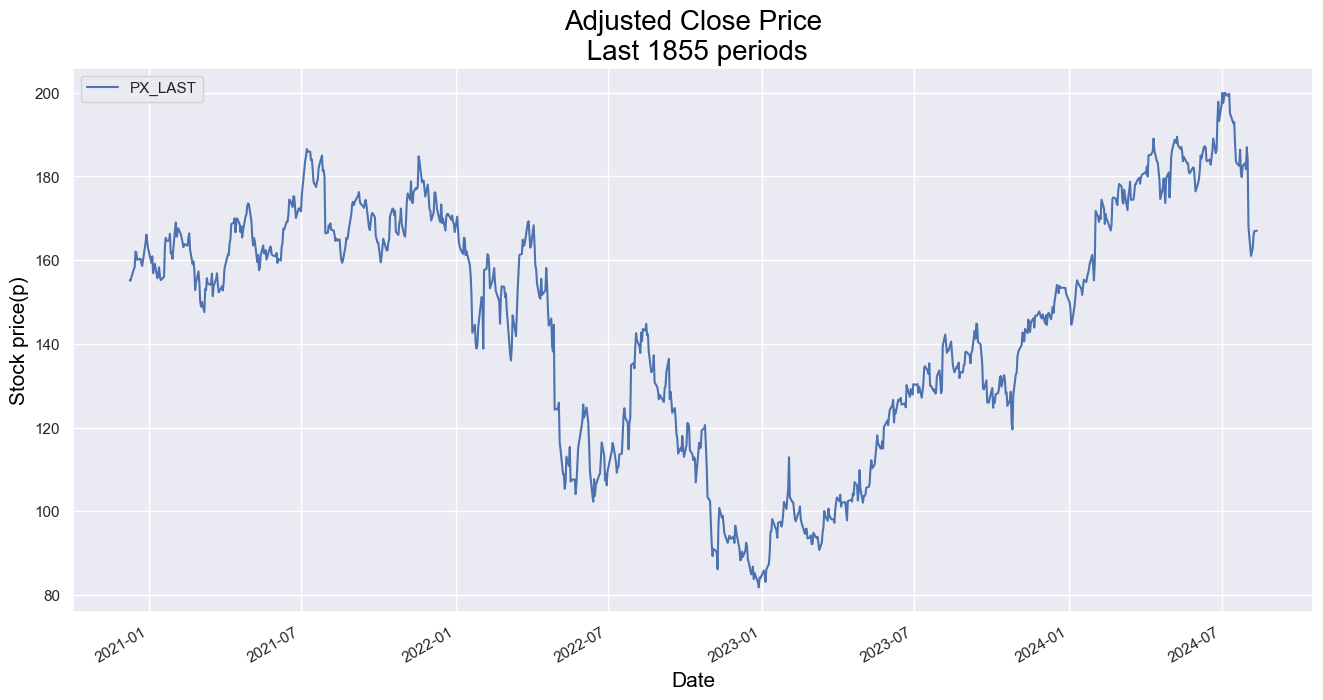

In [25]:
title_txt = "Adjusted Close Price\n Last 1855 periods"
label_txt = "AZN.L Adj Close"

df_last_923_plot()

In [27]:
#Stationarity Check

In [29]:
# ACF and PACF

In [31]:
#style.available

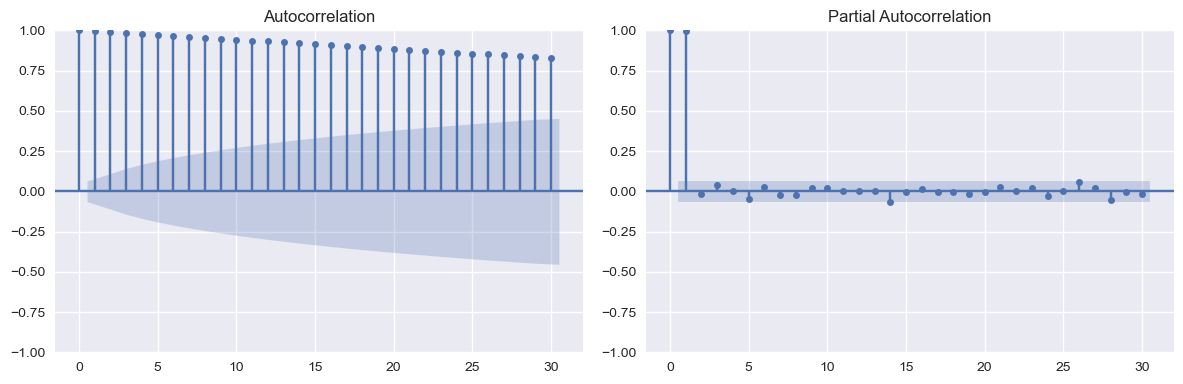

In [33]:
def acf_pacf_plot(y, lags = None, figsize =(12, 4)):
    plt.style.use('seaborn-v0_8')
    fig = plt.figure(figsize = figsize)
    layout = (1,2)
    acf_ax = plt.subplot2grid(layout, (0,0))
    pacf_ax = plt.subplot2grid(layout, (0,1))

    smt.graphics.plot_acf(y, lags = lags, ax=acf_ax)
    smt.graphics.plot_pacf(y, lags = lags, ax = pacf_ax)
    plt.tight_layout()

acf_pacf_plot(df_last_923['PX_LAST'], lags = 30)

In [35]:
df_last_923

,PX_LAST
Dates,
2020-12-09,155.210
2020-12-10,155.075
2020-12-11,155.821
2020-12-14,157.849
2020-12-15,158.256
...,...
2024-08-06,161.930
2024-08-07,162.770
2024-08-08,165.800


In [37]:
# ADF Test

result = adfuller(df_last_923.dropna())
print(f"ADF Statistics: {result[0]}")
print(f"p-value: {result[1]}")


ADF Statistics: -1.51923259337083
p-value: 0.5239767068627873


In [39]:
# Differencing - if p value is less than significance level we don't requie differecing

In [41]:
# Differencing

result = adfuller(df_last_923.diff().dropna())
print(f"ADF Statistics: {result[0]}")
print(f"p-value: {result[1]}")


ADF Statistics: -29.87583047833685
p-value: 0.0


In [43]:
# new dataframe for differenced prices

df_last_923_diff = df_last_923.diff().dropna()

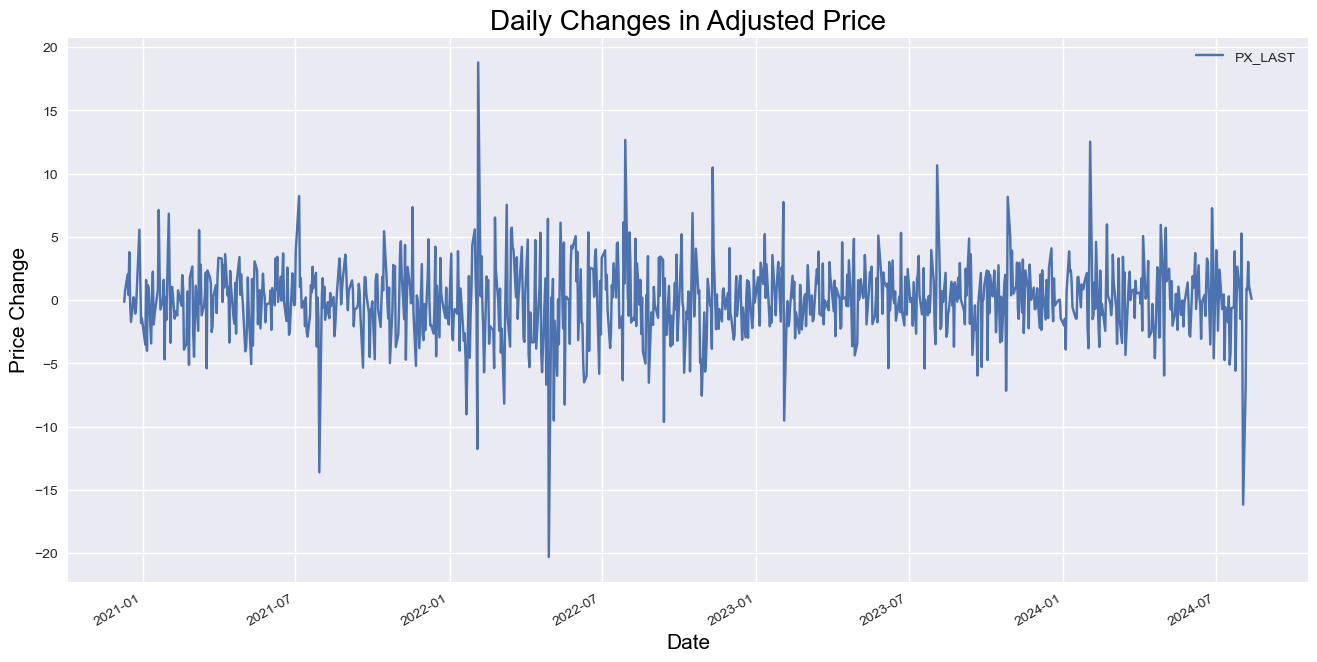

In [45]:
def returns_plot():
    plt.style.use('seaborn-v0_8')
    df_last_923_diff.plot(figsize = (16, 8))
    plt.title("Daily Changes in Adjusted Price", color = 'black', fontsize = 20)
    plt.xlabel('Date', color='black', fontsize = 15)
    plt.ylabel('Price Change', color = 'black', fontsize = 15);
    plt.show()

returns_plot()

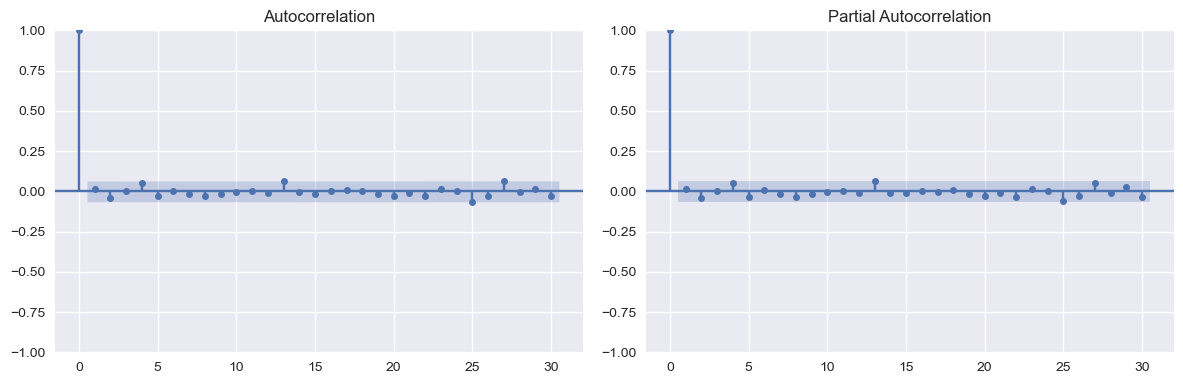

In [47]:
# ACF and PACF for the differenced data

def acf_pacf_plot(y, lags = None, figsize = (12, 4)):
    plt.style.use('seaborn-v0_8')
    fig = plt.figure(figsize = figsize)
    layout = (1,2)
    acf_ax = plt.subplot2grid(layout, (0,0))
    pacf_ax = plt.subplot2grid(layout, (0,1))

    smt.graphics.plot_acf(y, lags=lags, ax = acf_ax)
    smt.graphics.plot_pacf(y, lags= lags, ax=pacf_ax)
    plt.tight_layout()

acf_pacf_plot(df_last_923_diff, lags = 30)

In [49]:
# Grid Search

In [51]:
def best_param(model, data, pdq, pdqs):
    ans = []
    for comb in tqdm(pdq):
        for combs in tqdm(pdqs):
            try:
                mod = model(data,
                            order = comb,
                           seasonal_order = combs,
                           enforce_stationarity = False,
                           enforce_invertibility = False)
                output = mod.fit()
                ans.append([comb, combs, output.aic])
            except:
                continue

    ans_df = pd.DataFrame(ans, columns = ['pdq', 'pdqs', 'aic'])
    return ans_df.loc[ans_df.aic.idxmin()]

In [53]:
p = d = q = range(0, 5)
d = [1]

pdq = list(product(p, d, q))

pdqs = [(x[0], x[1], x[2], 12) for x in list(product(p, d, q))]

In [30]:
# ! Do not Run this code - computation time >5 hours

#best_param(SARIMAX, df_last_923, pdq, pdqs)

""" result = 109
pdq	(0, 1, 4)
pdqs	(1, 1, 4, 12)
aic	4415.431553"""

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

,109
pdq,"(0, 1, 4)"
pdqs,"(1, 1, 4, 12)"
aic,4415.431553


In [55]:
# Modelling

In [57]:
# Test - Train Split

In [87]:
index = round(len(df_last_923)*.80)

train = df_last_923.iloc[:index]
test = df_last_923.iloc[index:]

In [89]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [91]:
# Fitting and training the models

model = SARIMAX(train,
               order=(0,1,4),
               seasonal_order=(1,1,4,12),
               enforce_stationarity=False,
               enforce_invertibility=False)

output = model.fit()

In [92]:
print(output.summary())

                                     SARIMAX Results                                      
Dep. Variable:                            PX_LAST   No. Observations:                  738
Model:             SARIMAX(0, 1, 4)x(1, 1, 4, 12)   Log Likelihood               -1740.211
Date:                            Mon, 19 Aug 2024   AIC                           3500.423
Time:                                    11:23:50   BIC                           3545.525
Sample:                                         0   HQIC                          3517.890
                                            - 738                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0024      0.035      0.069      0.945      -0.067       0.072
ma.L2         -0.0004      0.040   

In [93]:
# Residuals Analysis


#Ljung- Box Test

ljung_box, p_value = acorr_ljungbox(output.resid)

print(f'Ljung-Box test: {ljung_box[:10]}')
print(f'p-value: {p_value[:10]}')


Ljung-Box test: lb_stat
p-value: lb_pvalue


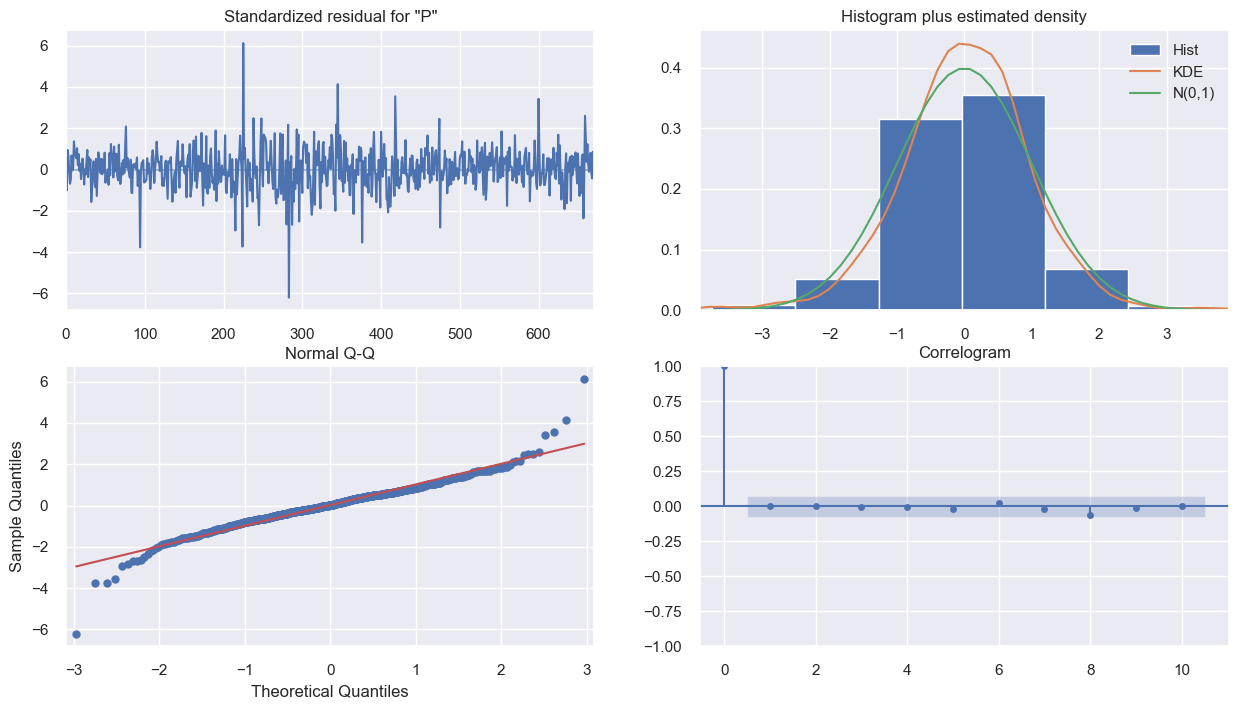

In [94]:
output.plot_diagnostics(figsize = (15, 8))
plt.show()

In [95]:
# Testing the model

# Get forecast
fc = output.get_forecast(len(test))
conf = fc.conf_int()

# Transforming the values back to normal
fc_series = pd.Series(fc.predicted_mean).set_axis(test.index, axis = 0)
lower_series = pd.Series(conf.iloc[:, 0]).set_axis(test.index, axis = 0)
upper_series = pd.Series(conf.iloc[:, 1]).set_axis(test.index, axis = 0)

# Get in-sample predictions
predictions = output.get_prediction(dynamic=False)
pred = predictions.predicted_mean

conf_int = predictions.conf_int()
low_conf = pd.Series(conf_int.iloc[:, 0], index=train.index)
upper_conf = pd.Series(conf_int.iloc[:, 1], index=train.index)

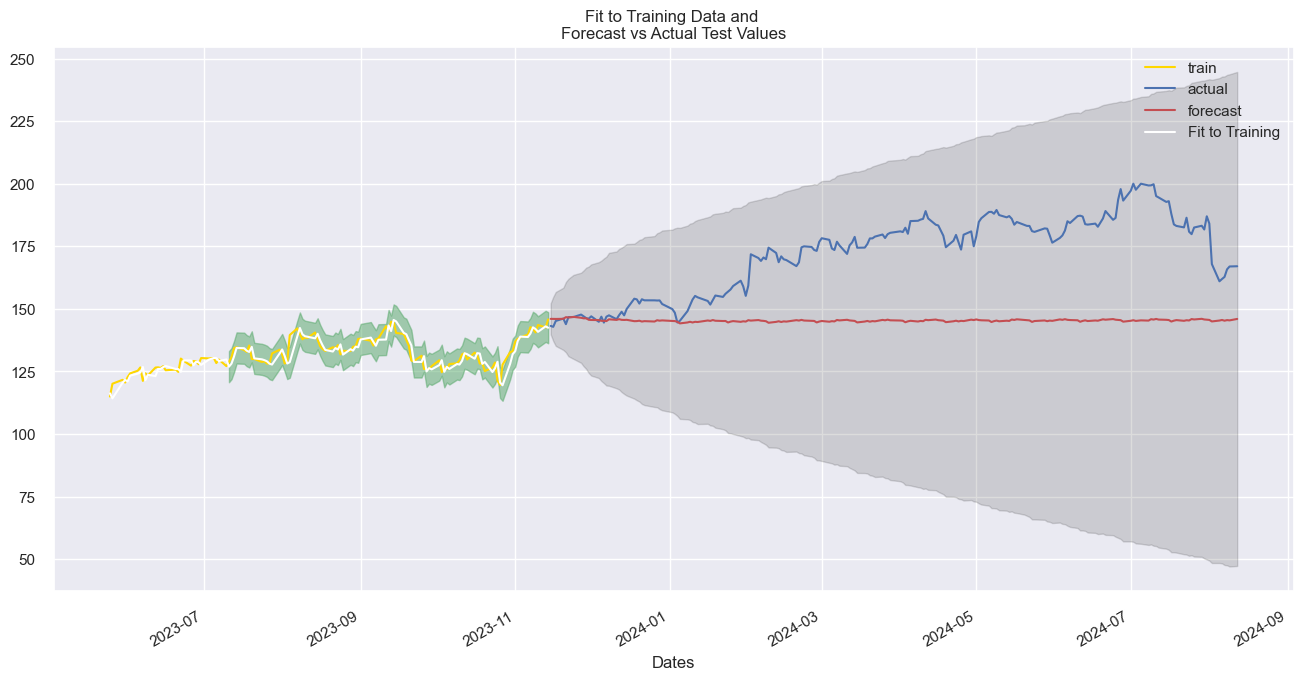

In [101]:
sns.set(rc={'figure.figsize':(16, 8)})

# Plotting the training set, test set, forecast, and confidence interval.
plt.plot(train[-120:], label='train', color='gold')
plt.plot(test, label='actual', color='b')
plt.plot(fc_series, label='forecast', color='r')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)

# Plotting against the training data
pred[-120:].plot(label='Fit to Training', color='w')

# Confidence interval for the fitted data
plt.fill_between(conf_int[-90:].index, conf_int[-90:].iloc[:,0], conf_int[-90:].iloc[:,1], color='g',alpha=.5)

plt.title('Fit to Training Data and \nForecast vs Actual Test Values')
plt.legend()
plt.show()


In [103]:
# Calculate the RMSE

forecast = pred
actual_val = train['PX_LAST']

# Calculating our errors
rmse = np.sqrt(((forecast - actual_val) ** 2).mean())

print("The Root Mean Squared Error: ", rmse)



The Root Mean Squared Error:  7.242847579964648


In [105]:
# Fitting and training with the entire dataset


model = SARIMAX(df_last_923,
                order=(0, 1, 4),
                seasonal_order=(1,1,4,12),
                enforce_stationarity=False,
                enforce_invertibility=False)
output = model.fit()


In [107]:
# Getting the forecast of future values
future = output.get_forecast(steps=90)

# Predicted values
pred_fut = pd.Series(future.predicted_mean.values,
                     index=pd.date_range(start=df_last_923.index[-1]+datetime.timedelta(days=1), periods=90, freq="D"))

# Confidence interval for our forecasted values
pred_conf = pd.DataFrame(future.conf_int().values,
                      index=pd.date_range(start=df_last_923.index[-1]+datetime.timedelta(days=1), periods=90, freq="D"))

# Saving last daily prediction for later
d90 = pred_fut[-1]

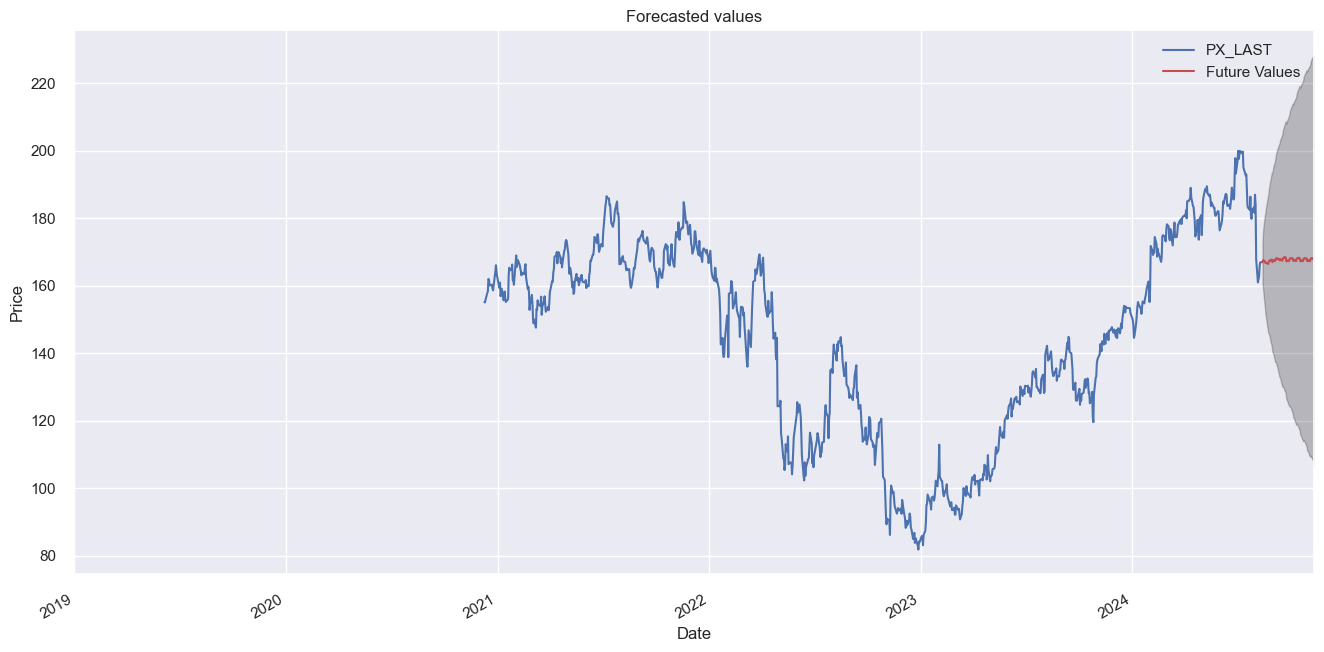

In [109]:
  # Plotting the prices up to the most recent
ax = df_last_923.plot(label='Actual', figsize=(16,8))

# Plotting the forecast
pred_fut.plot(ax=ax, label='Future Values', color='r')

# Shading in the confidence interval
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=.25)

ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.xlim(['2019', pred_fut.index[-1]])
plt.title('Forecasted values')
plt.legend()
plt.show()

In [111]:

sarimax_preds = pd.DataFrame([d90], index=['day'], columns=['prediction'])
sarimax_preds

,prediction
day,167.275212
